In [757]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 10,000 Data Set

In [758]:
data = pd.read_csv('../artifacts/student_risk_dataset_int.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Attendance Rate (%)                10000 non-null  float64
 2   Course Engagement (%)              10000 non-null  float64
 3   Previous Academic Performance (%)  10000 non-null  float64
 4   Study Hours                        10000 non-null  float64
 5   Extracurricular                    10000 non-null  int64  
 6   Mother Qualification               10000 non-null  int64  
 7   Father Qualification               10000 non-null  int64  
 8   Health Issues                      10000 non-null  int64  
 9   Disciplinary Actions               10000 non-null  int64  
 10  Learning Disabilities              10000 non-null  int64  
 11  Socioeconomic Status               10000 non-null  int6

## Data Preprocessing

In [759]:
data.head()

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,0,58.0,50.0,51.0,3.0,0,0,1,0,0,0,2,1
1,1,59.0,55.0,51.0,1.0,1,0,1,1,1,0,1,1
2,0,67.0,51.0,59.0,3.0,1,2,2,1,1,0,0,1
3,0,57.0,42.0,64.0,1.0,1,1,0,1,0,0,1,1
4,0,67.0,44.0,58.0,3.0,0,2,2,1,0,0,1,1


In [760]:
data.duplicated().sum()

np.int64(6)

In [761]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,10000.0,0.4987,0.500023,0.0,0.0,0.0,1.0,1.0
Attendance Rate (%),10000.0,79.4269,15.510987,50.0,64.0,85.0,92.0,100.0
Course Engagement (%),10000.0,69.6663,15.472792,40.0,54.0,75.0,83.0,90.0
Previous Academic Performance (%),10000.0,72.0546,12.011505,50.0,60.0,75.0,82.0,90.0
Study Hours,10000.0,5.7394,2.728192,1.0,3.0,6.0,8.0,10.0
Extracurricular,10000.0,0.4055,0.491013,0.0,0.0,0.0,1.0,1.0
Mother Qualification,10000.0,1.1045,0.701020,0.0,1.0,1.0,2.0,2.0
Father Qualification,10000.0,1.1069,0.698227,0.0,1.0,1.0,2.0,2.0
Health Issues,10000.0,0.2430,0.428917,0.0,0.0,0.0,0.0,1.0
Disciplinary Actions,10000.0,0.1745,0.379558,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Risk'>

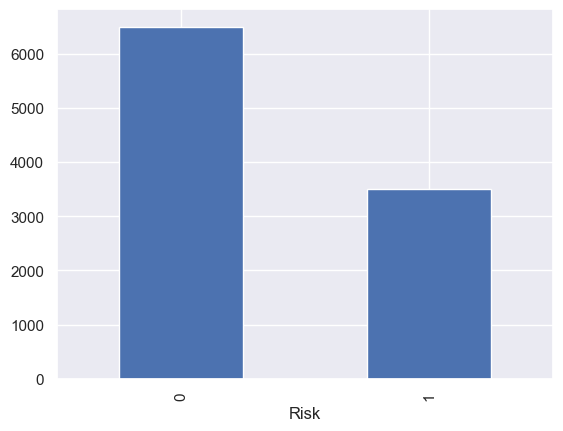

In [762]:
data['Risk'].value_counts().plot.bar()

In [763]:
num_cols = data.select_dtypes(include=np.number).columns
numerical_data = data[num_cols]

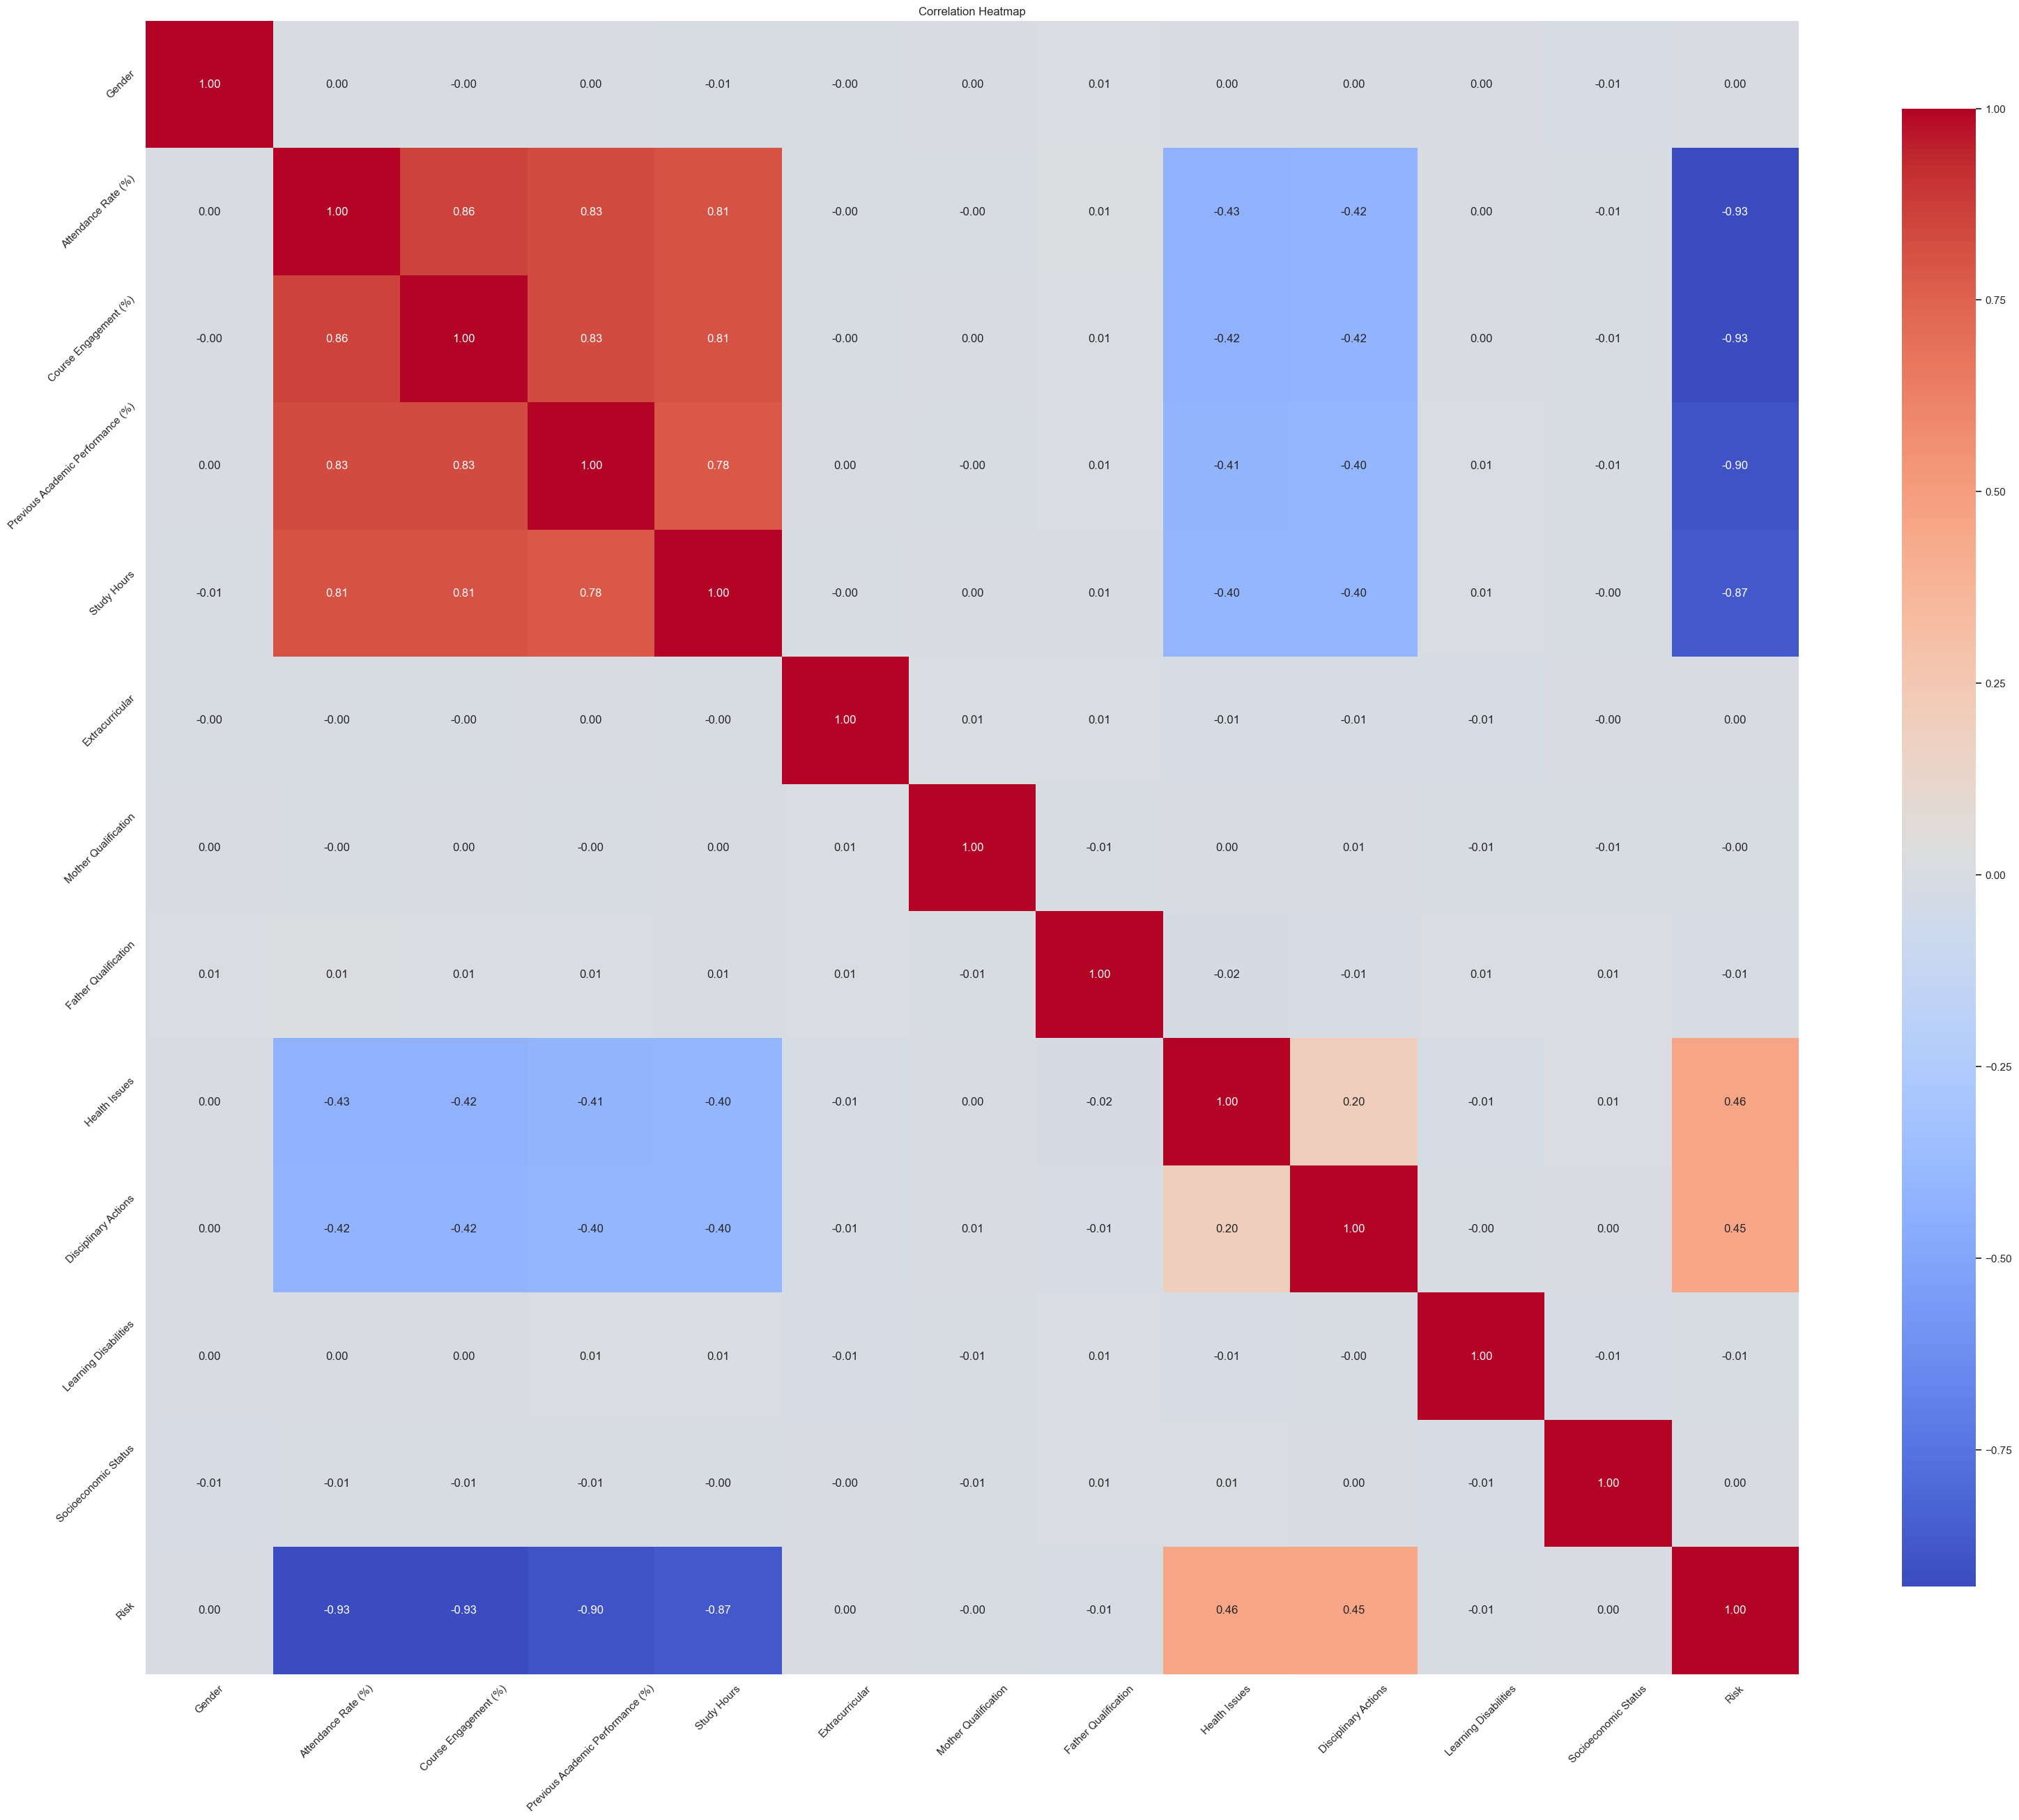

In [764]:
# Set the size of the heatmap
plt.figure(figsize=(32, 28))
# Create a heatmap
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Set titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# Show the plot
plt.show()

## Divide Dataset

In [765]:
data

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,0,58.0,50.0,51.0,3.0,0,0,1,0,0,0,2,1
1,1,59.0,55.0,51.0,1.0,1,0,1,1,1,0,1,1
2,0,67.0,51.0,59.0,3.0,1,2,2,1,1,0,0,1
3,0,57.0,42.0,64.0,1.0,1,1,0,1,0,0,1,1
4,0,67.0,44.0,58.0,3.0,0,2,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,93.0,77.0,79.0,6.0,0,1,1,0,1,0,2,0
9996,0,84.0,85.0,79.0,7.0,1,1,1,0,0,0,0,0
9997,1,81.0,88.0,81.0,7.0,1,1,2,1,0,0,1,0
9998,1,94.0,83.0,89.0,6.0,1,1,2,0,0,0,0,0


In [766]:
import sklearn.metrics as sm

In [767]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataTransform = data.copy()
for dataset in data.columns:
  dataTransform[dataset] = labelencoder.fit_transform(data[dataset])

In [768]:
dataTransform

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status,Risk
0,0,8,10,1,2,0,0,1,0,0,0,2,1
1,1,9,15,1,0,1,0,1,1,1,0,1,1
2,0,17,11,9,2,1,2,2,1,1,0,0,1
3,0,7,2,14,0,1,1,0,1,0,0,1,1
4,0,17,4,8,2,0,2,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,34,28,25,5,0,1,1,0,1,0,2,0
9996,0,25,36,25,6,1,1,1,0,0,0,0,0
9997,1,22,39,27,6,1,1,2,1,0,0,1,0
9998,1,35,34,35,5,1,1,2,0,0,0,0,0


In [769]:
X = dataTransform.drop(['Risk'], axis = 1)

In [770]:
X

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,0,8,10,1,2,0,0,1,0,0,0,2
1,1,9,15,1,0,1,0,1,1,1,0,1
2,0,17,11,9,2,1,2,2,1,1,0,0
3,0,7,2,14,0,1,1,0,1,0,0,1
4,0,17,4,8,2,0,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,34,28,25,5,0,1,1,0,1,0,2
9996,0,25,36,25,6,1,1,1,0,0,0,0
9997,1,22,39,27,6,1,1,2,1,0,0,1
9998,1,35,34,35,5,1,1,2,0,0,0,0


In [771]:
Y = dataTransform['Risk']

In [772]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Risk, Length: 10000, dtype: int64

In [773]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [774]:
X_train.shape

(8000, 12)

In [775]:
X_test.shape

(2000, 12)

## Imbalanced dataset

In [776]:
Y_train.value_counts()

Risk
0    5238
1    2762
Name: count, dtype: int64

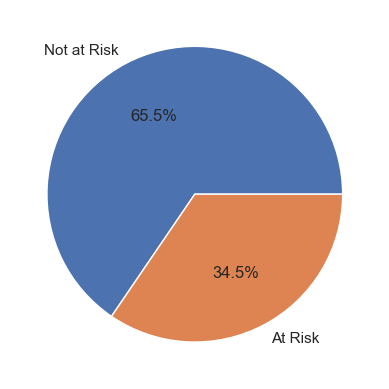

In [777]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

### SMOTE

In [778]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print(X_train_smote.shape, Y_train_smote.shape)

(10476, 12) (10476,)


In [779]:
Y_train_smote.value_counts()

Risk
1    5238
0    5238
Name: count, dtype: int64

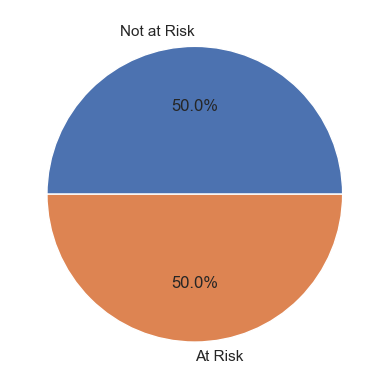

In [780]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

In [781]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
# Define the model and SMOTE object
model = RandomForestClassifier()

# Define a parameter grid for SMOTE
param_grid = {
    'smote__k_neighbors': [2, 3, 5, 7],
    'smote__sampling_strategy': [0.4, 0.5, 0.6, 0.7, 0.8]  
}

# Wrap SMOTE and the model in a pipeline
from imblearn.pipeline import Pipeline
smote = SMOTE()
pipeline = Pipeline([('smote', smote), ('model', model)])

# Define scoring based on F1 score (for minority class)
scorer = make_scorer(f1_score, pos_label=1)

# Run grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, Y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluate the performance
print(classification_report(Y_test, Y_pred, target_names=['Class 0', 'Class 1']))
roc_auc = roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC After Hyperparameter Tuning: {roc_auc}")

Best parameters found:  {'smote__k_neighbors': 2, 'smote__sampling_strategy': 0.6}
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1262
     Class 1       1.00      1.00      1.00       738

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC After Hyperparameter Tuning: 1.0


In [782]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5, sampling_strategy=0.6)
X_train_smote_new, Y_train_smote_new = smote.fit_resample(X_train, Y_train)

# Print the shape of the resampled training set
print(X_train_smote_new.shape, X_train_smote_new.shape)

(8380, 12) (8380, 12)


In [783]:
from sklearn.metrics import make_scorer, f1_score, classification_report, roc_auc_score
# Initialize the classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Get classification report for Precision, Recall, and F1-Score
print("Before SMOTE:")
print(classification_report(Y_test, Y_pred, target_names=['Class 0', 'Class 1']))

# Compute ROC-AUC score
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

Before SMOTE:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1262
     Class 1       1.00      1.00      1.00       738

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC: 1.0


In [784]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTE
#smote = SMOTE()
#X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Retrain the model on the balanced dataset
model.fit(X_train_smote_new, Y_train_smote_new)

# Make predictions on the test set
Y_pred_smote = model.predict(X_test)

# Get classification report for Precision, Recall, and F1-Score
print("After SMOTE:")
print(classification_report(Y_test, Y_pred_smote, target_names=['Class 0', 'Class 1']))

# Compute ROC-AUC score
roc_auc_smote = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC After SMOTE: {roc_auc_smote}")

After SMOTE:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1262
     Class 1       1.00      1.00      1.00       738

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC After SMOTE: 1.0


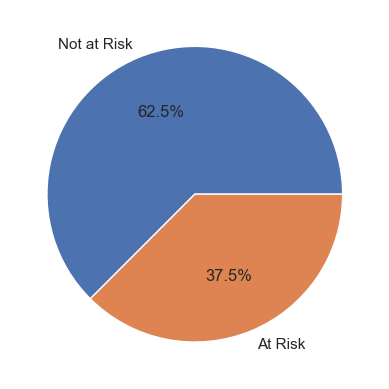

In [785]:
plt.pie(np.array([Y_train_smote_new.value_counts()[0], Y_train_smote_new.value_counts()[1]]), 
        labels=['Not at Risk', 'At Risk'], 
        autopct='%1.1f%%')  
plt.show()

In [786]:
X_train_smote

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,0,10,4,8,3,1,1,2,1,1,0,1
1,0,35,40,20,7,0,1,0,0,0,0,0
2,0,41,34,18,7,0,2,1,0,0,0,1
3,0,24,36,28,5,0,2,2,0,0,0,0
4,1,38,28,36,8,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10471,0,18,19,6,2,1,0,2,1,0,0,0
10472,1,15,16,0,2,0,1,1,0,0,0,0
10473,0,12,9,4,2,0,1,0,0,0,0,1
10474,1,9,4,7,1,0,1,1,0,0,0,1


In [787]:
Y_train_smote

0        1
1        0
2        0
3        0
4        0
        ..
10471    1
10472    1
10473    1
10474    1
10475    1
Name: Risk, Length: 10476, dtype: int64

In [788]:
X_train_smote_new

,Gender,Attendance Rate (%),Course Engagement (%),Previous Academic Performance (%),Study Hours,Extracurricular,Mother Qualification,Father Qualification,Health Issues,Disciplinary Actions,Learning Disabilities,Socioeconomic Status
0,0,10,4,8,3,1,1,2,1,1,0,1
1,0,35,40,20,7,0,1,0,0,0,0,0
2,0,41,34,18,7,0,2,1,0,0,0,1
3,0,24,36,28,5,0,2,2,0,0,0,0
4,1,38,28,36,8,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8375,0,10,3,9,2,0,1,2,0,0,0,1
8376,0,8,9,2,2,1,0,0,0,1,0,1
8377,0,4,0,7,0,0,1,1,1,0,0,2
8378,1,5,9,12,1,0,0,0,1,0,0,0


In [789]:
Y_train_smote_new

0       1
1       0
2       0
3       0
4       0
       ..
8375    1
8376    1
8377    1
8378    1
8379    1
Name: Risk, Length: 8380, dtype: int64

## Model Training and Evaluation

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [791]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Risk', axis=1), data['Risk'], test_size=0.2, random_state=42)

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [792]:

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_smote_new, Y_train_smote_new)

# Make predictions
y_train_pred = lr.predict(X_train_smote_new)
y_test_pred = lr.predict(X_test)

# Evaluate the model
training_scores(Y_train_smote_new, y_train_pred)
validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [793]:
lr = LogisticRegression()
# Retrain the model on the balanced dataset
lr.fit(X_train_smote_new, Y_train_smote_new)

# Make predictions on the test set
Y_pred_smote_train = lr.predict(X_train_smote_new)
Y_pred_smote_test = lr.predict(X_test)

training_scores(Y_train_smote_new, Y_pred_smote_train)
validation_scores(Y_test, Y_pred_smote_test)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Naive Bayes

In [794]:
gnb = GaussianNB()
gnb.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = gnb.predict(X_train_smote_new)
y_test_pred = gnb.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)
validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Decision Tree

In [795]:
dt = DecisionTreeClassifier()

dt.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = dt.predict(X_train_smote_new)

y_test_pred = dt.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)
validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Random Forest

In [796]:
rf = RandomForestClassifier()

rf.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = rf.predict(X_train_smote_new)

y_test_pred = rf.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Support Vector Machine

In [797]:
svm = SVC()

svm.fit(X_train_smote_new, Y_train_smote_new)

y_train_pred = svm.predict(X_train_smote_new)

y_test_pred = svm.predict(X_test)

training_scores(Y_train_smote_new, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


Text(110.44999999999997, 0.5, 'predicted class axis')

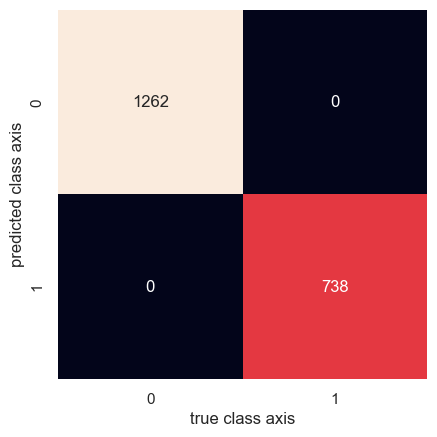

In [798]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
sb.set()
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
confusionmt = confusion_matrix(Y_test,y_test_pred)
sb.heatmap(confusionmt.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true class axis')
plt.ylabel('predicted class axis')

In [799]:
import pickle
with open ('../static/model/model_new.pickle', 'wb') as file:
    pickle.dump(rf, file)

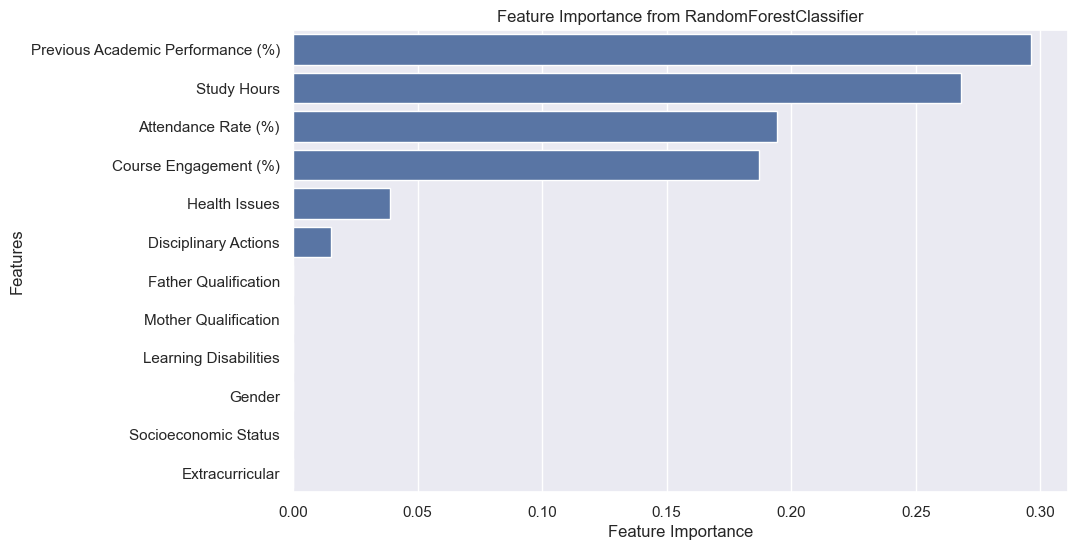

In [800]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances from the RandomForestClassifier
feature_importances = rf.feature_importances_

# Create a sorted list of feature names and their corresponding importance values
features_sorted = sorted(zip(X_train_smote.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Unzip the sorted list into separate lists for feature names and importance values
feature_names, importance_values = zip(*features_sorted)

# Create a bar plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_values, y=feature_names)

# Add plot labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier")

# Display the plot
plt.show()

In [801]:
shap_values_positive = shap_values[1]

In [802]:
print(shap_values_positive.shape)
print(X_train_smote_new.shape)

(12, 2)
(8380, 12)


In [803]:
print(X_train_smote.columns)

Index(['Gender', 'Attendance Rate (%)', 'Course Engagement (%)',
       'Previous Academic Performance (%)', 'Study Hours', 'Extracurricular',
       'Mother Qualification', 'Father Qualification', 'Health Issues',
       'Disciplinary Actions', 'Learning Disabilities',
       'Socioeconomic Status'],
      dtype='object')


In [804]:
print(type(shap_values))
print(len(shap_values))
if isinstance(shap_values, list):
    print([x.shape for x in shap_values])  
else:
    print(shap_values.shape)  


<class 'numpy.ndarray'>
8345
(8345, 12, 2)


In [805]:
# Check the shape of shap_values and X_train_smote
print(shap_values[:, :, 1].shape)
print(X_train_smote.shape)


(8345, 12)
(10476, 12)


In [806]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_smote_new)

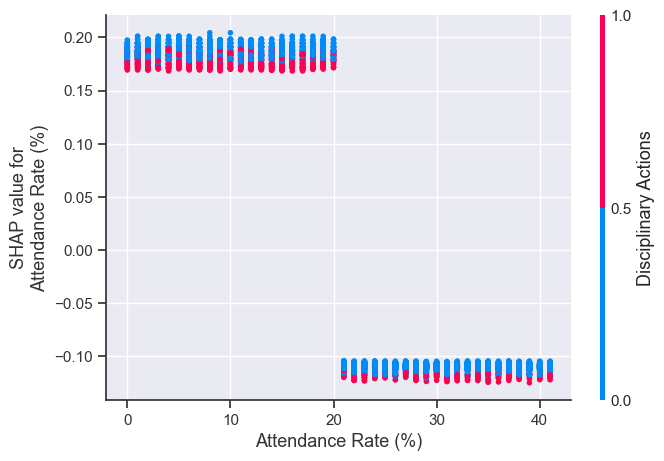

In [807]:
# Generate a dependence plot for 'Attendance Rate (%)'
shap.dependence_plot('Attendance Rate (%)', shap_values[:, :, 1], X_train_smote_new, interaction_index="auto")

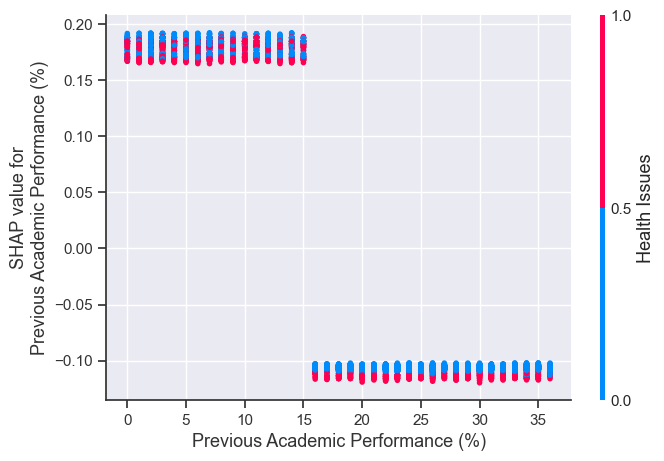

In [808]:
# Generate a dependence plot for 'Previous Academic Performance (%)'
shap.dependence_plot('Previous Academic Performance (%)', shap_values[:, :, 1], X_train_smote_new, interaction_index="auto")

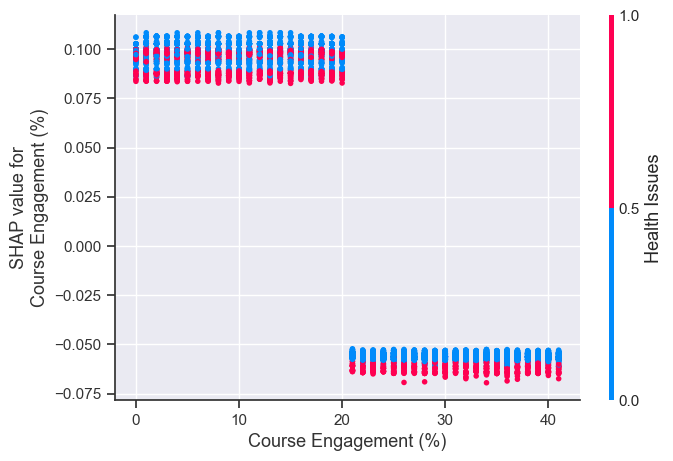

In [809]:
# Generate a dependence plot for 'Course Engagement (%)'
shap.dependence_plot('Course Engagement (%)', shap_values[:, :, 1], X_train_smote_new, interaction_index="auto")

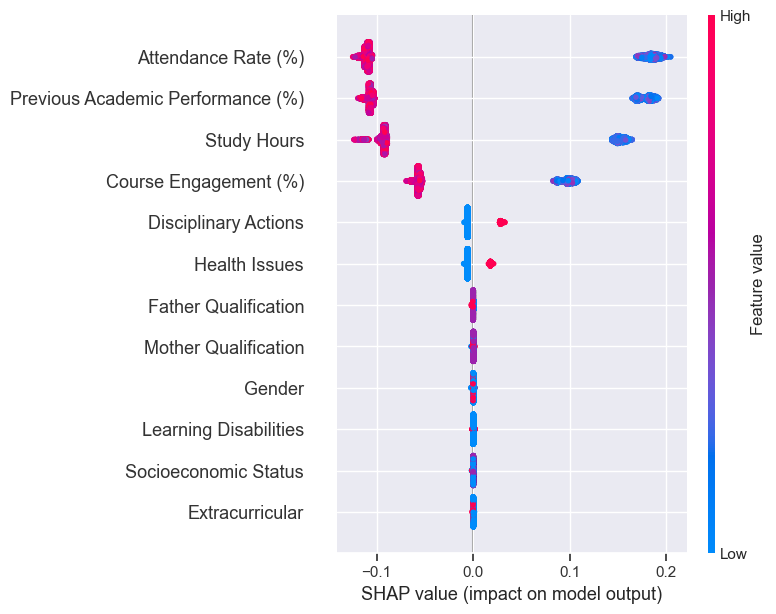

In [810]:
import shap

shap_values_positive = shap_values[:, :, 1] 

shap.summary_plot(shap_values_positive, X_train_smote_new)

In [811]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_smote)
shap_values_positive = shap_values[:, :, 1]

instance_index = 0  
selected_instance = X_train_smote.iloc[instance_index]
selected_shap_values = shap_values_positive[instance_index]
shap.initjs() 
force_plot = shap.force_plot(explainer.expected_value[1], selected_shap_values, selected_instance)
shap.save_html('force_plot.html', force_plot)  
force_plot

In [812]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_smote_new)

shap_values_positive = shap_values[:, :, 1]

instance_index = 0 
selected_instance = X_train_smote.iloc[instance_index]
selected_shap_values = shap_values_positive[instance_index]

features_of_interest = ['Attendance Rate (%)', 'Course Engagement (%)', 'Previous Academic Performance (%)']

feature_indices = [X_train_smote_new.columns.get_loc(feature) for feature in features_of_interest]

shap_values_of_interest = {feature: selected_shap_values[index] for feature, index in zip(features_of_interest, feature_indices)}
shap_values_of_interest_display = "\n".join(f"{feature}: SHAP Value = {shap_value:.2f}" for feature, shap_value in shap_values_of_interest.items())

print("Key Features Analyzed:")
print(shap_values_of_interest_display)

Key Features Analyzed:
Attendance Rate (%): SHAP Value = 0.12
Course Engagement (%): SHAP Value = 0.11
Previous Academic Performance (%): SHAP Value = 0.18
